In [14]:
from numba_code import *
import matplotlib.pyplot as plt
plt.style.use('default')

# Extracting saved dynamics

Useful functions to extract the dynamic

In [15]:
def ratio(fix, x):
    
    #Number of mutants in deme 0 in the first x steps of the dynamics
    center_mutant=fix[:x,0,0]
    
    leaf1_mutant=fix[:x,1,0]
    leaf2_mutant=fix[:x,2,0]
    leaf3_mutant=fix[:x,3,0]
    
    mutant = center_mutant + leaf1_mutant + leaf2_mutant + leaf3_mutant

    #Number of wild-types in deme 0 in the first x steps of the dynamics
    center_WT=fix[:x,0,1]
    
    leaf1_WT=fix[:x,1,1]
    leaf2_WT=fix[:x,2,1]
    leaf3_WT=fix[:x,3,1]
    
    WT = center_WT + leaf1_WT + leaf2_WT + leaf3_WT
    

    #Ratio of mutant in all population in the first x steps of the dynamics
    ratioM=mutant/(WT+mutant)
    
    return ratioM


def extract(path, x):
    
    ratios = np.zeros([100,x])
    
    for i in range(100):
        path_sub = path + '/fix_' + str(i+1) + '.npz'
        fix = np.load(path_sub)['arr_0']
        ratios[i] = ratio(fix,x)
    
    return ratios

## Asymmetric well-mixed configuration

High migration rate

In [16]:
#Path to the asymmetric well-mixed configuration with high migration rate
path = "Asymmetric/Well-mixed/High"

x=40

#Ratio of mutant in demes in the first x steps of the dynamics
well_mixed_high_ratioM = extract(path, x)

#Statistic
well_mixed_high_ratioM_mean = np.mean(well_mixed_high_ratioM, axis= 0)
well_mixed_high_ratioM_std = np.std(well_mixed_high_ratioM, axis= 0)

Low migration rate

In [17]:
#Path to the asymmetric well-mixed configuration with low migration rate
path = "Asymmetric/Well-mixed/Low"

x=40

#Ratio of mutant in demes in the first x steps of the dynamics
well_mixed_low_ratioM = extract(path, x)

#Statistic
well_mixed_low_ratioM_mean = np.mean(well_mixed_low_ratioM, axis= 0)
well_mixed_low_ratioM_std = np.std(well_mixed_low_ratioM, axis= 0)

## Asymmetric OUT > IN configuration

High migration rate

In [18]:
#Path to the asymmetric OUT > IN configuration with high migration rate
path = "Asymmetric/Out_in/High"
x=40

#Ratio of mutant in demes in the first x steps of the dynamics
o_high_ratioM = extract(path, x)

#Statistic
o_high_ratioM_mean = np.mean(o_high_ratioM, axis= 0)
o_high_ratioM_std = np.std(o_high_ratioM, axis= 0)

Low migration rate

In [19]:
#Path to the asymmetric OUT > IN configuration with low migration rate
path = "Asymmetric/Out_in/Low"

x=40

#Ratio of mutant in demes in the first x steps of the dynamics
o_low_ratioM = extract(path, x)

#Statistic
o_low_ratioM_mean = np.mean(o_low_ratioM, axis= 0)
o_low_ratioM_std = np.std(o_low_ratioM, axis= 0)

## Asymmetric IN > OUT configuration

High migration rate

In [20]:
#Path to the asymmetric IN > OUT configuration with high migration rate
path = "Asymmetric/In_out/High"
x=40

#Ratio of mutant in demes in the first x steps of the dynamics
i_high_ratioM = extract(path, x)

#Statistic
i_high_ratioM_mean = np.mean(i_high_ratioM, axis= 0)
i_high_ratioM_std = np.std(i_high_ratioM, axis= 0)

Low migration rate

In [21]:
#Path to the asymmetric IN > OUT configuration with low migration rate
path = "Asymmetric/In_out/Low"
x=40

#Ratio of mutant in demes in the first x steps of the dynamics
i_low_ratioM = extract(path, x)

#Statistic
i_low_ratioM_mean = np.mean(i_low_ratioM, axis= 0)
i_low_ratioM_std = np.std(i_low_ratioM, axis= 0)

## Figure 3

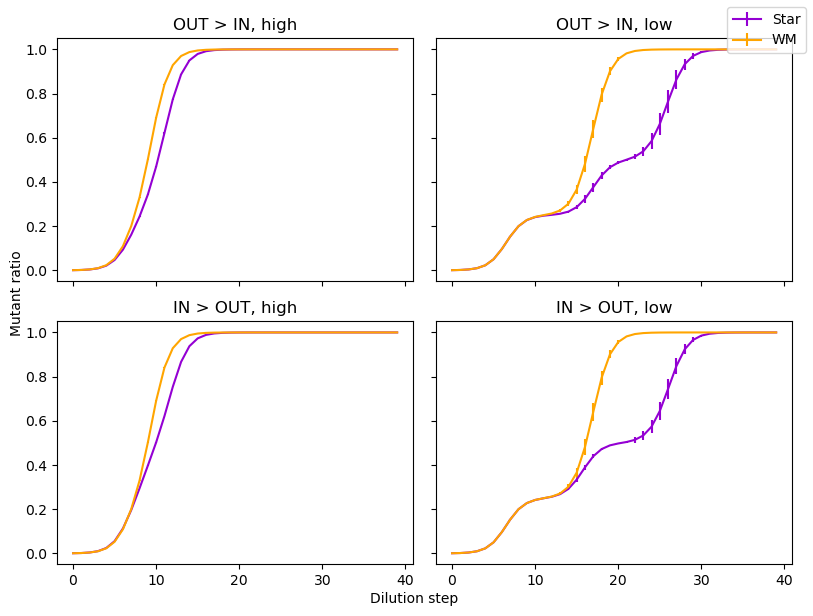

In [22]:
fig, ax = plt.subplots(2,2,figsize= (8,6), sharey = True, sharex = True)

ax[0, 0].errorbar(np.arange(0,x,1),o_high_ratioM_mean,o_high_ratioM_std, color='darkviolet', label='Star')
ax[0, 0].errorbar(np.arange(0,x,1),well_mixed_high_ratioM_mean,well_mixed_high_ratioM_std, color='orange', label='WM')
ax[0, 0].set_title('OUT > IN, high')

ax[0, 1].errorbar(np.arange(0,x,1),o_low_ratioM_mean,o_low_ratioM_std, color='darkviolet')
ax[0, 1].errorbar(np.arange(0,x,1),well_mixed_low_ratioM_mean,well_mixed_low_ratioM_std, color='orange')
ax[0, 1].set_title('OUT > IN, low')

ax[1, 0].errorbar(np.arange(0,x,1),i_high_ratioM_mean,i_high_ratioM_std, color='darkviolet')
ax[1, 0].errorbar(np.arange(0,x,1),well_mixed_high_ratioM_mean,well_mixed_high_ratioM_std, color='orange')
ax[1, 0].set_title('IN > OUT, high')

ax[1, 1].errorbar(np.arange(0,x,1),i_low_ratioM_mean,i_low_ratioM_std, color='darkviolet')
ax[1, 1].errorbar(np.arange(0,x,1),well_mixed_low_ratioM_mean,well_mixed_low_ratioM_std, color='orange')
ax[1, 1].set_title('IN > OUT, low')
    
fig.tight_layout()

fig.text(0.45,0, "Dilution step")
fig.text(0,0.45, "Mutant ratio", rotation = 90)
fig.legend()

## Figure 5

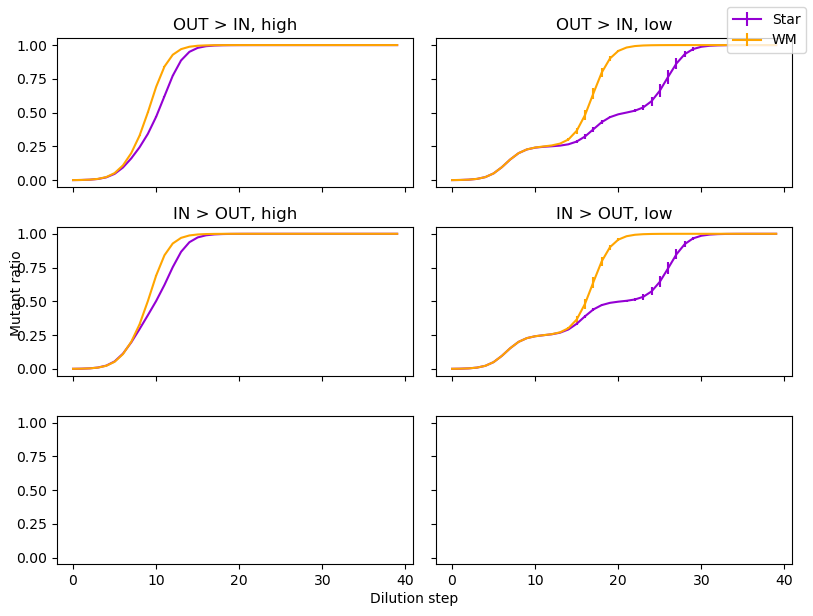

In [23]:
fig, ax = plt.subplots(3,2,figsize= (8,6), sharey = True, sharex = True)

for i in range(100):
    ax[0,0].plot(np.arange(0,x,1),o_high_ratioM[i],color='darkviolet')
    ax[0,0].plot(np.arange(0,x,1),well_mixed_high_ratioM[i],color='orange')
    ax[1,0].plot(np.arange(0,x,1),o_high_ratioM[i],color='darkviolet')
    ax[1,0].plot(np.arange(0,x,1),well_mixed_high_ratioM[i],color='orange')
    ax[2,0].plot(np.arange(0,x,1),o_high_ratioM[i],color='darkviolet')
    ax[2,0].plot(np.arange(0,x,1),well_mixed_high_ratioM[i],color='orange')


ax[0, 0].set_title('OUT > IN, high')

ax[0, 1].errorbar(np.arange(0,x,1),o_low_ratioM_mean,o_low_ratioM_std, color='darkviolet')
ax[0, 1].errorbar(np.arange(0,x,1),well_mixed_low_ratioM_mean,well_mixed_low_ratioM_std, color='orange')
ax[0, 1].set_title('OUT > IN, low')

ax[1, 0].errorbar(np.arange(0,x,1),i_high_ratioM_mean,i_high_ratioM_std, color='darkviolet')
ax[1, 0].errorbar(np.arange(0,x,1),well_mixed_high_ratioM_mean,well_mixed_high_ratioM_std, color='orange')
ax[1, 0].set_title('IN > OUT, high')

ax[1, 1].errorbar(np.arange(0,x,1),i_low_ratioM_mean,i_low_ratioM_std, color='darkviolet')
ax[1, 1].errorbar(np.arange(0,x,1),well_mixed_low_ratioM_mean,well_mixed_low_ratioM_std, color='orange')
ax[1, 1].set_title('IN > OUT, low')
    
fig.tight_layout()

fig.text(0.45,0, "Dilution step")
fig.text(0,0.45, "Mutant ratio", rotation = 90)
fig.legend()